<a href="https://colab.research.google.com/github/Sandwhaletree/Mai_Finlab/blob/main/A_%E7%94%9F%E6%B4%BB%E6%87%89%E7%94%A8/B1_borb_PDF%E8%BD%89%E6%8F%9B_230919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔥🔥🔥 **borb-PDF**
* [github-BORB](https://github.com/jorisschellekens/borb)
* [桑鳥網-borb中文教學](https://os.sangniao.com/s/3745098119)
* [桑鳥網-在Python中使用borb对扫描的PDF执行OCR](https://news.sangniao.com/p/1016017201)

In [ ]:
#指定google雲端路徑，方便儲存與下載檔案
import os
os.chdir('/content/drive/MyDrive/colab_cloud/pdf/borb')

In [ ]:
!pip install borb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#務必點選重新跑過
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!tesseract --version

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


In [ ]:
#下載語言包
!sudo apt-get install tesseract-ocr-chi-tra tesseract-ocr-chi-sim #tesseract-ocr-kor tesseract-ocr-jpn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-chi-sim is already the newest version (4.00~git24-0e00fe6-1.2).
tesseract-ocr-chi-tra is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!tesseract --list-langs

List of available languages (4):
chi_sim
eng
osd
chi_tra


In [ ]:
from borb.pdf import Document

In [ ]:
#2.2.1 Creating an empty Document instance
def main():
    doc: Document = Document() #創建一個新的Document物件
if __name__ == "__main__": #檢查當前模塊是否是程式的主要模塊
    main()                 #main()函數用於執行程式的主要內容

In [ ]:
#2.2.2 Creating and adding a Page
from borb.pdf import Document
from borb.pdf import Page

def main():
    # create Document
    doc: Document = Document()

    # create Page
    page: Page = Page()

    # add Page to Document
    doc.add_page(page)


if __name__ == "__main__":
    main()

In [ ]:
#2.2.3 Setting a PageLayout
from borb.pdf import Document
from borb.pdf import Page
from borb.pdf import PageLayout
from borb.pdf import SingleColumnLayout


def main():
    # create Document
    doc: Document = Document()

    # create Page
    page: Page = Page()

    # add Page to Document
    doc.add_page(page)

    # set a PageLayout
    layout: PageLayout = SingleColumnLayout(page)


if __name__ == "__main__":
    main()

In [ ]:
#2.2.4 Adding a Paragraph to the Page using PageLayout

from borb.pdf import Document
from borb.pdf import Page
from borb.pdf import PageLayout
from borb.pdf import SingleColumnLayout
from borb.pdf import Paragraph


def main():
    # create Document
    doc: Document = Document()

    # create Page
    page: Page = Page()

    # add Page to Document
    doc.add_page(page)

    # set a PageLayout
    layout: PageLayout = SingleColumnLayout(page)

    # add a Paragraph
    layout.add(Paragraph("Hello World!"))


if __name__ == "__main__":
    main()

In [ ]:
#经典的Hello World如運作
from pathlib import Path

from borb.pdf import Document
from borb.pdf import Page
from borb.pdf import SingleColumnLayout
from borb.pdf import Paragraph
from borb.pdf import PDF

# 创建一个空文件
pdf = Document()

# 添加一个空的页面
page = Page()
pdf.add_page(page)

# 使用一个PageLayout（本例中为SingleColumnLayout）。
layout = SingleColumnLayout(page)

# 添加一个段落对象
layout.add(Paragraph("Hello World!"))

# 存储PDF
with open(Path("output.pdf"), "wb") as f: #產出output.pdf檔案
    PDF.dumps(f, pdf)

### 👉 **用borb創建幾頁&有文字的pdf檔**
* 每一页都以"10页中的第x页"开始。这将使我们以后更容易识别这些页面。
* 每页包含1段文字。

In [ ]:
from borb.pdf import HexColor
from borb.pdf import PageLayout
from borb.pdf import SingleColumnLayout
from borb.pdf import Paragraph
from borb.pdf import Document #
from borb.pdf import Page #
from borb.pdf import PDF
from decimal import Decimal

def create_document(heading_color: HexColor = HexColor("0b3954"), #設置標題框的顏色，指定藍色0b3954
                    text_color: HexColor = HexColor("de6449"), #設置文本框的顏色，指定深粉紅de6449
                    file_name: str = "output1.pdf"): #設置輸出PDF檔名，"output.pdf"

    d: Document = Document()

    N: int = 10
    for i in range(0, N): #循環10次

        # 创建一个新的页面，并将其附加到文档中。

        p: Page = Page()
        d.add_page(p)

        # Set the PageLayout of the new Page
        l: PageLayout = SingleColumnLayout(p)

        # Add the paragraph to identify the Page
        l.add(Paragraph("Page %d of %d" % (i+1, N), #在每個頁面中添加一個標題框，用於顯示當前頁面的頁碼
                        font_color=heading_color, #用標題框的顏色和字體大小
                        font_size=Decimal(24)))

        # 添加一段虚拟文本

        l.add(Paragraph("""
                        Lorem Ipsum is simply dummy text of the printing and typesetting industry.
                        Lorem Ipsum has been the industry's standard dummy text ever since the 1500s,
                        when an unknown printer took a galley of type and scrambled it to make a type specimen book.
                        It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.
                        It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages,
                        and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.
                        """,
                        font_color=text_color))

    # 将文件保留在磁盘上
    with open(file_name, "wb") as pdf_out_handle:
        PDF.dumps(pdf_out_handle, d)
        print('完成輸出檔案:',file_name)

In [ ]:
#呼叫-產出output1.pdf
create_document()

### 👉 **在Python中拆分PDF檔**
* 將10頁1個pdf檔，分割成2個pdf檔(1-5、6-10頁)
* 將10頁1個pdf檔，分割成2個pdf檔(偶數頁、奇頁)

#### **1.使用篇**

In [ ]:
#將10頁1個pdf檔，分割成2個pdf檔(1-5、6-10頁)
#要開啟的filename檔名

def split_pdf(filename):

  #讀取PDF
  with open(filename, "rb") as pdf_file_handle:  #檔案output1.pdf
    input_pdf = PDF.loads(pdf_file_handle)

  # 创建两个空的PDF，以容纳分裂的每一半
  output_pdf_1 = Document()
  output_pdf_2 = Document()

  # 分割
  for i in range(0, 10):
    if i < 5:
      output_pdf_1.add_page(input_pdf.get_page(i)) #0-5頁存在第一個pdf檔案
      # 撰写PDF
      with open(f"{filename}_1.pdf", "wb") as pdf_out_handle:
        PDF.dumps(pdf_out_handle, output_pdf_1)
        print(f'完成輸出檔案:{filename}_1.pdf')
    else:
      output_pdf_2.add_page(input_pdf.get_page(i)) #6-10頁存在第二個pdf檔案
      # 撰写PDF
      with open({f"{filename}_2.pdf", "wb") as pdf_out_handle:
        PDF.dumps(pdf_out_handle, output_pdf_2)
        print(f'完成輸出檔案:{filename}_2.pdf')

In [ ]:
#讀取PDF
with open('./PaddleOCR.pdf', "rb") as pdf_file_handle:  #檔案output1.pdf
  input_pdf = PDF.loads(pdf_file_handle)

In [ ]:
%%time
# 创建一个新的页面，并将其附加到文档中。
p: Page = Page()

CPU times: user 315 µs, sys: 63 µs, total: 378 µs
Wall time: 386 µs


In [ ]:
# 创建两个空的PDF，以容纳分裂的每一半
output_pdf_1 = Document()

In [ ]:
# 分割
for i in range(0, 10):
  if i < 9:
    output_pdf_1.add_page(input_pdf.get_page(i)) #0-5頁存在第一個pdf檔案
    # 撰写PDF
    with open("./PaddleOCR_1.pdf", "wb") as pdf_out_handle:
      PDF.dumps(pdf_out_handle, output_pdf_1)
      print('完成輸出檔案:{filename}_1.pdf')

完成輸出檔案:{filename}_1.pdf
完成輸出檔案:{filename}_1.pdf
完成輸出檔案:{filename}_1.pdf
完成輸出檔案:{filename}_1.pdf
完成輸出檔案:{filename}_1.pdf
完成輸出檔案:{filename}_1.pdf
完成輸出檔案:{filename}_1.pdf
完成輸出檔案:{filename}_1.pdf
完成輸出檔案:{filename}_1.pdf


#### **2.教學篇**

In [ ]:
#指定google雲端路徑，方便儲存與下載檔案
import os
os.chdir('/content/drive/MyDrive/colab_cloud/pdf/borb')

In [ ]:
#將10頁1個pdf檔，分割成2個pdf檔(1-5、6-10頁)
def split_half_half():

  #讀取PDF
  with open("output1.pdf", "rb") as pdf_file_handle:  #檔案output1.pdf
    input_pdf = PDF.loads(pdf_file_handle)

  # 创建两个空的PDF，以容纳分裂的每一半
  output_pdf_1 = Document()
  output_pdf_2 = Document()

  # 分割
  for i in range(0, 10):
    if i < 5:
      output_pdf_1.add_page(input_pdf.get_page(i)) #0-5頁存在第一個pdf檔案
    else:
      output_pdf_2.add_page(input_pdf.get_page(i)) #6-10頁存在第二個pdf檔案

  # 撰写PDF
  with open("output1_1.pdf", "wb") as pdf_out_handle:
    PDF.dumps(pdf_out_handle, output_pdf_1)
    print('完成輸出檔案:',output_pdf_1)

  # 撰写PDF
  with open("output1_2.pdf", "wb") as pdf_out_handle:
    PDF.dumps(pdf_out_handle, output_pdf_2)
    print('完成輸出檔案:', output_pdf_2)

In [ ]:
#呼叫-拆分2個檔案output1_1.pdf、output1_2.pdf
split_half_half()

完成輸出檔案: {<borb.io.read.types.Name object at 0x7f10457a0a90>: {<borb.io.read.types.Name object at 0x7f1044d3bb20>: {<borb.io.read.types.Name object at 0x7f1045682730>: {<borb.io.read.types.Name object at 0x7f104599d370>: <borb.io.read.types.Name object at 0x7f1044d13430>, <borb.io.read.types.Name object at 0x7f104599d250>: {<borb.io.read.types.Name object at 0x7f104545c970>: Decimal('5'), <borb.io.read.types.Name object at 0x7f104542cfd0>: [{<borb.io.read.types.Name object at 0x7f1044c48460>: <borb.io.read.types.Name object at 0x7f104545c250>, <borb.io.read.types.Name object at 0x7f104545cf40>: [Decimal('0'), Decimal('0'), Decimal('595'), Decimal('842')], <borb.io.read.types.Name object at 0x7f10459a1d30>: {<borb.io.read.types.Name object at 0x7f104545cc10>: <borb.io.read.types.Name object at 0x7f1044bfc6a0>, <borb.io.read.types.Name object at 0x7f104545cd60>: Decimal('515'), <borb.io.read.types.Name object at 0x7f1044bfcd30>: b'x\xda\xbdT\xcb\x8e\xdb0\x0c\xbc\xfb+xk\x0b,T\xcbo\x1f[\xa0

In [ ]:
#將10頁1個pdf檔，分割成2個pdf檔(偶數頁、奇數頁)
def split_even_odd():

  #讀取PDF
  with open("output1.pdf", "rb") as pdf_file_handle:
    input_pdf = PDF.loads(pdf_file_handle)

  # 重新创建两个空的PDF，以容纳每一半的分裂。

  output_pdf_1 = Document()
  output_pdf_2 = Document()

  # 分割
  for i in range(0, 10):
    if i % 2 == 0:
      output_pdf_1.add_page(input_pdf.get_page(i))
    else:
      output_pdf_2.add_page(input_pdf.get_page(i))

  # 撰写PDF
  with open("output1_odd.pdf", "wb") as pdf_out_handle:
    PDF.dumps(pdf_out_handle, output_pdf_1)
    print('完成輸出檔案:',output_pdf_1)

  # 撰写PDF
  with open("output1_even.pdf", "wb") as pdf_out_handle:
    PDF.dumps(pdf_out_handle, output_pdf_2)
    print('完成輸出檔案:', output_pdf_2)

In [ ]:
split_even_odd()

完成輸出檔案: {<borb.io.read.types.Name object at 0x7f1044b18850>: {<borb.io.read.types.Name object at 0x7f1044b18af0>: {<borb.io.read.types.Name object at 0x7f1044b18e50>: {<borb.io.read.types.Name object at 0x7f1044b2a0a0>: <borb.io.read.types.Name object at 0x7f1044b18f70>, <borb.io.read.types.Name object at 0x7f1045497af0>: {<borb.io.read.types.Name object at 0x7f1044b18370>: Decimal('5'), <borb.io.read.types.Name object at 0x7f1044b2a3d0>: [{<borb.io.read.types.Name object at 0x7f104547b520>: <borb.io.read.types.Name object at 0x7f10457a91c0>, <borb.io.read.types.Name object at 0x7f10457a90a0>: [Decimal('0'), Decimal('0'), Decimal('595'), Decimal('842')], <borb.io.read.types.Name object at 0x7f10457a9a30>: {<borb.io.read.types.Name object at 0x7f10457a9fd0>: <borb.io.read.types.Name object at 0x7f1044dd71f0>, <borb.io.read.types.Name object at 0x7f10457a9070>: Decimal('515'), <borb.io.read.types.Name object at 0x7f1044dd71c0>: b'x\xda\xbdT\xcb\x8e\xdb0\x0c\xbc\xfb+xk\x0b,T\xcbo\x1f[\xa0

### 👉 **使用borb對PDF檔執行OCR**
* 我们将使用一个特殊的"事件监听器"实现，叫做 OCRAsOptionalContentGroup。这个类使用tesseract（或者说pytesseract）来对Document进行OCR（光学字符识别）。
* 將10頁1個pdf檔，分割成2個pdf檔(偶數頁、奇頁)

#### 👉 **學習borb其他篇章**

##### 👉 **7.1 Extracting tables from a PDF**
> 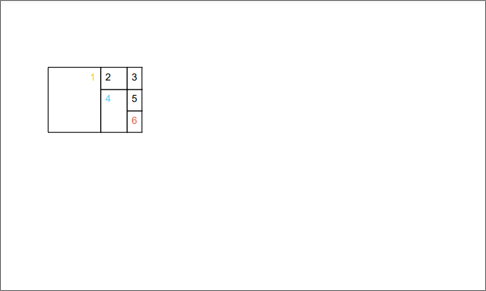

In [ ]:
from decimal import Decimal

import typing
from borb.pdf import HexColor, X11Color
from borb.pdf import Alignment
from borb.pdf import SingleColumnLayout
from borb.pdf import PageLayout
from borb.pdf import TableCell
from borb.pdf import FlexibleColumnWidthTable
from borb.pdf import Table
from borb.pdf import Paragraph
from borb.pdf import Document
from borb.pdf import Page
from borb.pdf import PDF

In [ ]:
#製作table
def main():

    # create empty Document
    d: Document = Document() #建立空PDF表，儲存至Document，簡寫/屬性為d

    # add Page
    p: Page = Page() #建立空page，儲存至Page，簡寫/屬性為p
    d.add_page(p) #於d新增頁數p

    # create PageLayout
    l: PageLayout = SingleColumnLayout(p) #新頁面版面配置為SingleColumnLayout

    # create Table
    l.add(
        FlexibleColumnWidthTable(number_of_rows=3, number_of_columns=3) #創建一個FlexibleColumnWidthTable(3行3列)
        .add(
            TableCell(
                Paragraph(                                      #TableCell(Paragraph("1"))
                    "1",
                    font_color=HexColor("f1cd2e"),
                    horizontal_alignment=Alignment.RIGHT,
                ),
                row_span=3,
                preferred_width=Decimal(64),
            )
        )
        .add(TableCell(Paragraph("2")))                         #TableCell(Paragraph("2"))
        .add(TableCell(Paragraph("3")))                         #TableCell(Paragraph("3"))
        .add(
            TableCell(                                          #TableCell(Paragraph("4"))
                Paragraph(
                    "4",
                    font_color=HexColor("56cbf9"),
                    horizontal_alignment=Alignment.LEFT,
                ),
                row_span=2,
                preferred_width=Decimal(32),
            )
        )
        .add(TableCell(Paragraph("5")))                         #TableCell(Paragraph("5"))
        .add(TableCell(Paragraph("6", font_color=HexColor("de6449"))))          #TableCell(Paragraph("6"))
        .set_padding_on_all_cells(Decimal(5), Decimal(5), Decimal(5), Decimal(5)) #對表格中的所有單元格設置padding，即上、右、下、左的padding值均為5
    )

    # store
    with open("output2.pdf", "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, d)
        print('完成輸出檔案:output2.pdf')

In [ ]:
#輸出output2.pdf
main()

* borb偵測出表格單位
> 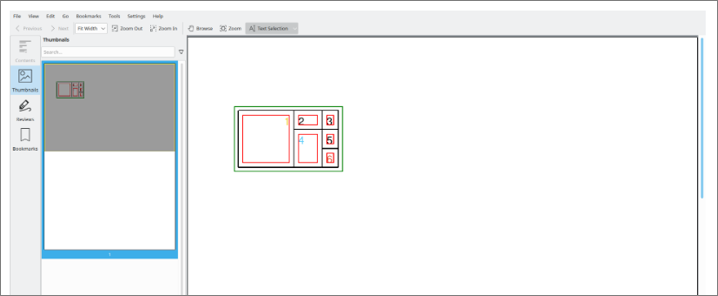

In [ ]:
from borb.toolkit.table.table_detection_by_lines import TableDetectionByLines
from borb.pdf.canvas.layout.annotation.square_annotation import SquareAnnotation

In [ ]:
def main():

    doc: typing.Optional[Document] = None
    l: TableDetectionByLines = TableDetectionByLines()
    with open("output2.pdf", "rb") as pdf_file_handle:
        doc = PDF.loads(pdf_file_handle, [l])

    assert doc is not None

    # get page
    p: Page = doc.get_page(0)

    # get Table(s)
    tables: typing.List[Table] = l.get_tables()[0]
    assert len(tables) > 0

    for r in l.get_table_bounding_boxes()[0]:
        r = r.grow(Decimal(5))
        p.add_annotation(SquareAnnotation(r, stroke_color=X11Color("Green")))

    for t in tables:

        # add one annotation around each cell
        for c in t._content:
            r = c.get_previous_paint_box()
            r = r.shrink(Decimal(5))
            p.add_annotation(SquareAnnotation(r, stroke_color=X11Color("Red")))

    # write
    with open("output2_1.pdf", "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, doc)
        print('完成輸出檔案:output2-1.pdf')

In [ ]:
#完成表格單位偵測
main()

完成輸出檔案:output2-1.pdf


##### **7.2 Performing OCR on a PDF**
* 这是迄今为止任何编程论坛或帮助平台上最经典的问题之一。***"我的文档中似乎没有文本。帮助？"或者 "你的文本提取代码样本对我的文档不起作用。** 怎么会这样？"

* 答案往往就像 "你的扫描仪讨厌你 "一样简单明了。
* 你将使用一个特殊的EventListener实现，称为OCRAsOptionalContentGroup。这个类使用tesseract（或者说pytesseract）来对Document进行OCR（光学字符识别）

#### **1.將PDF轉為OCR使用篇**

In [ ]:
import typing
from pathlib import Path
import pytesseract
from PIL import Image as PILImage  # Type: ignore [import]
from PIL import ImageDraw, ImageFont
from borb.pdf import Image
from borb.toolkit.ocr.ocr_as_optional_content_group import OCRAsOptionalContentGroup
from borb.pdf import PDF # NameError: name 'PDF' is not defined
#無法安裝pytesseract，直接用!pip install pytesseract>解決
from pathlib import Path
###tesseract-ocr安裝colab路徑:usr>share>tesseract-ocr>4.00>tessdata(上傳至這 )

In [ ]:
#指定google雲端路徑，方便儲存與下載檔案
import os
os.chdir('/content/drive/MyDrive/colab_cloud/pdf/split_pdf')

In [ ]:
#filename=
def pdf_ocr(filename):

    # set up everything for OCR
    tesseract_data_dir: Path = Path("/usr/share/tesseract-ocr/4.00/tessdata")
    assert tesseract_data_dir.exists()
    l: OCRAsOptionalContentGroup = OCRAsOptionalContentGroup(tesseract_data_dir)

    # read Document
    doc: typing.Optional[Document] = None
    with open(f"./{filename}.pdf", "rb") as pdf_file_handle:
        doc = PDF.loads(pdf_file_handle, [l])

    assert doc is not None

    # store Document
    with open(f"./{filename}_ocr.pdf", "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, doc)
        print(f"完成輸出檔案:{filename}_ocr.pdf")

In [ ]:
#輸入要轉換之檔名: PaddleOCR_1(要去掉.pdf)
pdf_ocr('4000_vocabulary')

完成輸出檔案:4000_vocabulary_ocr.pdf


In [ ]:
#应用SimpleTextExtraction，你应该能够检索到Document中的所有文本
from borb.toolkit.text.simple_text_extraction import SimpleTextExtraction

In [ ]:
#將檔案可搜尋文字輸出
def pdf_ocr_searchtext(filename):

    doc: typing.Optional[Document] = None
    l: SimpleTextExtraction = SimpleTextExtraction()
    with open(f"./{filename}_ocr.pdf", "rb") as pdf_file_handle:
        doc = PDF.loads(pdf_file_handle, [l])

    print(l.get_text()[0])

In [ ]:
pdf_ocr_searchtext('4000_vocabulary')

動物
    flea  [fli]     n. n. [C] [C] 跳蚤
cricket               n. [C] 蟋蟀
  pest     [put]      n. [C]  害蟲 ga ，討厭鬼
   caterpillar                    n. n. [C] [C] 毛毛蟲
  hive     [haw]     v. v. [C] [C] 蜂 巢
buzz      [bAZ]     vi vi..  （蜜蜂 ）嗡嗡地飛， '忙進忙出 ；n. 嗡嗡 聲
sting [st10] Vt.FJ' '           vt.  剌，螫， 叮
   sparrow       Cspæro]        n. n. [C] [C] 麻雀
beak &ik] n.[C)          n. [C] 鳥嘴
    chirp    [tf3--p]      vi. vi.  （鳥 ）啾啾 叫
feather n.                n. [C] 羽毛
lobster (labstæ] n.[CU)                n. [C/U] 龍蝦
   seal    [Sill     vt. 封 上，封 住 ； ;n. n. [C] 封條，Efi  海豹
   kangaroo        [,kænga-ru]         n. n.[C] [C] 袋鼠
   cattle           n. n. [U] 牛群 （ 集合 名詞 ）
    ivory   Cavan]       n. n. [U [U) ] 象牙
trunk [tlA0k] n.[C] , ,   

#### **2.教學篇**

In [ ]:
import typing
from pathlib import Path

from PIL import Image as PILImage  # Type: ignore [import]
from PIL import ImageDraw, ImageFont
from borb.pdf import Image

In [ ]:
#創建圖像
def create_image() -> PILImage: #創建個PILImage函數，用於返回一個PILImage對象

    # create new Image
    img = PILImage.new("RGB", (256, 256), color=(255, 255, 255))

    # create ImageFont
    # CAUTION: you may need to adjust the path to your particular font directory
    font = ImageFont.truetype(r"/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf", 24)  #LiberationMono-Bold.ttf #LiberationSans-Regular

    # draw text
    draw = ImageDraw.Draw(img)
    draw.text((10, 10), "Hello World!", fill=(0, 0, 0), font=font)

    # return
    return img

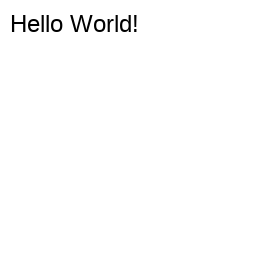

In [ ]:
create_image()

In [ ]:
#創建圖像並存檔
def create_image() -> PILImage:

    # create new Image
    img = PILImage.new("RGB", (256, 256), color=(255, 255, 255))

    # create ImageFont
    # CAUTION: you may need to adjust the path to your particular font directory
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf", 24)

    # draw text
    draw = ImageDraw.Draw(img)
    draw.fontmode = "L"
    draw.text((10, 10), "Hello World!", fill=(0, 0, 0), font=font)

    # return
    output_path: Path = Path('./').parent / "image_hello_world.png"
    img.save(output_path, dpi=(600, 600))
    return output_path

In [ ]:
#輸出image_hello_world.png檔案
create_image()

PosixPath('image_hello_world.png')

* 寫一段文字，並將image_hello_world.png圖片加入(代表不可解析之圖片圖片內容)
> 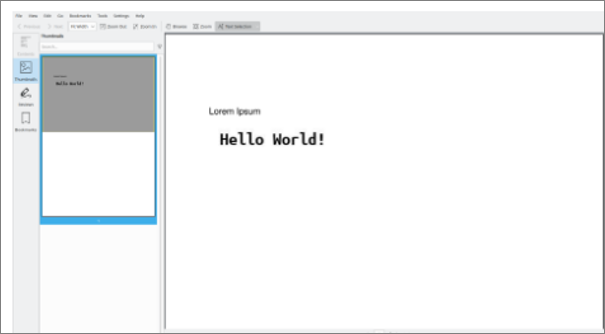

In [ ]:
#寫一段文字，並將image_hello_world.png圖片加入(代表不可解析之圖片圖片內容)
def main():

    # create Document
    d: Document = Document()

    # create/add Page
    p: Page = Page()
    d.add_page(p)

    # set PageLayout
    l: PageLayout = SingleColumnLayout(p)

    # add Paragraph
    l.add(Paragraph("Lorem Ipsum")) #增加文字段

    # add Image
    l.add(Image(create_image())) #加入Image()圖片，並用create_image()呼叫圖片'image_hello_world.png'

    # write
    with open("output3.pdf", "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, d)
        print('完成輸出檔案:output3.pdf')

In [ ]:
#輸出文字段&圖片-output3.pdf
main()

完成輸出檔案:output3.pdf


* 使用OCR將圖片上文字渲染，透過疊加後文字顯現
> 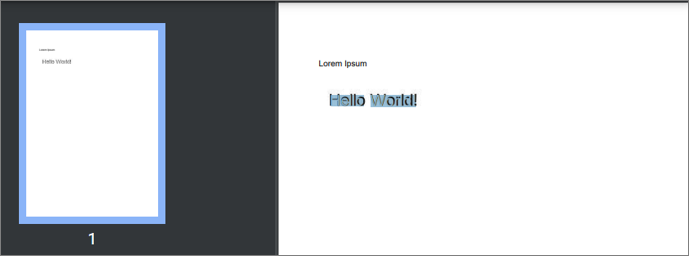

In [ ]:
#使用OCR
from borb.toolkit.ocr.ocr_as_optional_content_group import OCRAsOptionalContentGroup
#無法安裝pytesseract，直接用!pip install pytesseract>解決

from pathlib import Path

###tesseract-ocr安裝colab路徑:usr>share>tesseract-ocr>4.00>tessdata(上傳至這 )

In [ ]:
import pytesseract
from PIL import Image

In [ ]:
#指定google雲端路徑，方便儲存與下載檔案
import os
os.chdir('/content/drive/MyDrive/colab_cloud/pdf/borb')

In [ ]:
def main():

    # set up everything for OCR
    tesseract_data_dir: Path = Path("/usr/share/tesseract-ocr/4.00/tessdata")
    assert tesseract_data_dir.exists()
    l: OCRAsOptionalContentGroup = OCRAsOptionalContentGroup(tesseract_data_dir)

    # read Document
    doc: typing.Optional[Document] = None
    with open("output3.pdf", "rb") as pdf_file_handle:
        doc = PDF.loads(pdf_file_handle, [l])

    assert doc is not None

    # store Document
    with open("output4.pdf", "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, doc)
        print('完成輸出檔案:output4.pdf')

In [ ]:
#完成輸出檔案:output4.pdf
main()

完成輸出檔案:output4.pdf


In [ ]:
#应用SimpleTextExtraction，你应该能够检索到Document中的所有文本
from borb.toolkit.text.simple_text_extraction import SimpleTextExtraction

In [ ]:
#將檔案可搜尋文字輸出
def main():

    doc: typing.Optional[Document] = None
    l: SimpleTextExtraction = SimpleTextExtraction()
    with open("output4.pdf", "rb") as pdf_file_handle:
        doc = PDF.loads(pdf_file_handle, [l])

    print(l.get_text()[0])

In [ ]:
#圖片文字顯現
main()

Lorem Ipsum
Hello World!


##### **7.3 Exporting PDF as a (PIL) image**
> 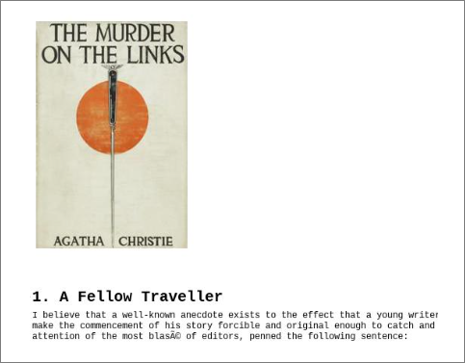

In [ ]:
from borb.pdf import Image

In [ ]:
def main():

    # create Document
    doc: Document = Document()

    # create Page
    page: Page = Page()

    # add Page to Document
    doc.add_page(page)

    # set a PageLayout
    layout: PageLayout = SingleColumnLayout(page)

    # add an Image
    layout.add(
        Image(
            "https://www.gutenberg.org/cache/epub/58866/pg58866.cover.medium.jpg",  #圖片超連結網址
            width=Decimal(200),
            height=Decimal(300),
        )
    )

    # add a Paragraph
    layout.add(
        Paragraph("1. A Fellow Traveller", font="Helvetica-bold", font_size=Decimal(20)) #大標題
    )
    layout.add(
        Paragraph(                                                           #內文
            """
    I believe that a well-known anecdote exists to the effect that a young
    writer, determined to make the commencement of his story forcible and
    original enough to catch and rivet the attention of the most blasé of
    editors, penned the following sentence:
    """
        )
    )

    # store
    with open("output5.pdf", "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, doc)
        print('完成輸出檔案:output5.pdf')

In [ ]:
#圖片文字顯現
main()

完成輸出檔案:output5.pdf


#### **7.3 Exporting PDF as a (PIL) image**

In [ ]:
from borb.pdf import PDF
from borb.toolkit.export.pdf_to_jpg import PDFToJPG

In [ ]:
#指定google雲端路徑，方便儲存與下載檔案
import os
os.chdir('/content/drive/MyDrive/colab_cloud/pdf/split_pdf')

In [ ]:
# read PDF
with open("./4000_vocab2.pdf", "rb") as pdf_file_handle:
    doc = PDF.loads(pdf_file_handle)

# convert to JPG
PDFToJPG.convert_pdf_to_jpg(doc)[0].save("./jpg/4000_2.jpg")